# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats
from matplotlib import pyplot as plt


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [49]:
# Your code here.
x = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'age': x, 'tardies': y})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

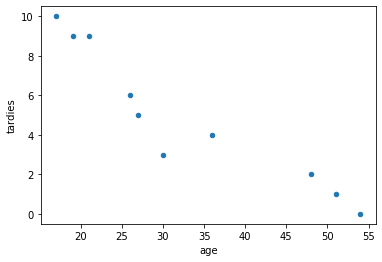

In [50]:
# Your code here.
scatter_plot = student_data.plot.scatter(x = 'age', y = 'tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [51]:
# Your response here. 
'''
Yes I see. My hipothesis is: the higher the age, the less tardies they have. So, young people are more often 
late for class.
'''

'\nYes I see. My hipothesis is: the higher the age, the less tardies they have. So, young people are more often \nlate for class.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [52]:
# Your response here.
#correlation:
corr_scatter = student_data.corr()
print(corr_scatter)
#covariance:
cov_scatter = student_data.cov()
print(cov_scatter)
#The ade and the number of tardies are 
'''
The large negative covariance (-45.57) tell us they are correlated, but doesn't tell us how strong their relation is. For instance,
we can observe that these variables are strongly negatively correlated, with a correlation of -0.94.
'''

              age   tardies
age      1.000000 -0.939163
tardies -0.939163  1.000000
                age    tardies
age      187.655556 -45.566667
tardies  -45.566667  12.544444


"\nThe large negative covariance (-45.57) tell us they are correlated, but doesn't tell us how strong their relation is. For instance,\nwe can observe that these variables are strongly negatively correlated, with a correlation of -0.94.\n"

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [53]:
# Your response here.
x = student_data['age']
y = student_data['tardies']
model1 = stats.linregress(x, y)
model1

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

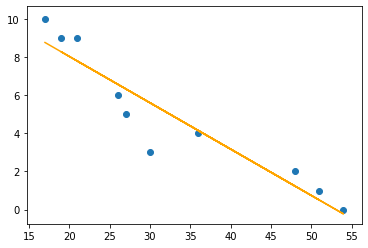

In [54]:
# Your code here.
regression_line1 = model1[0]*x + model1[1]
regression_plot1 = plt.plot(x, regression_line1, c = 'orange')
plt.scatter(x, y)

plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [55]:
# Your response here. 
'''
I'm very confident saying that the age is a good predictor of tardiness, because the correlation between them is too strong.
However, we might need to add more observations, at least 30 to have viable results; there are points like the one at 30 in
the x axis that might be an outlier or not.
'''

"\nI'm very confident saying that the age is a good predictor of tardiness, because the correlation between them is too strong.\nHowever, we might need to add more observations, at least 30 to have viable results; there are points like the one at 30 in\nthe x axis that might be an outlier or not.\n"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [58]:
# Import any libraries you may need & the data
import statsmodels.api as sm

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [65]:
# Your response here. 

corr_vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
corr_vehicles
#Judging by the correlations, all variables except Year are important and should be used to plot a regression model.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [71]:
# Your response here. 
X = vehicles[['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          8.760e+06
Date:                     Mon, 27 Jul 2020   Prob (F-statistic):                        0.00
Time:                             19:55:20   Log-Likelihood:                     -1.5515e+05
No. Observations:                    35952   AIC:                                  3.103e+05
Df Residuals:                        35949   BIC:                                  3.103e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    22.4724      0.051    437.446      0.000      22.372      22.573
Combined MPG          0.1052      0.010     10.622      0.000       0.086       0.125
Fuel Cost/Year        0.0408      0.000     86.909      0.000       0.040       0.042
==============================================================================
Omnibus:                    79210.856   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        470089111.722
Skew:                          20.397   Prob(JB):                         0.00
Kurtosis:                     561.701   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [73]:
# Your response here. 
'''
The most important variable is by far 'Fuel Barrels/Year', because of its high coefficient, which will lead to a considerable
variation of the CO2 emisions grams/mile. My model has an R-squared near 1, which is almost perfect but nothing close to reality.
All p-values are below 0.05 which means all our variables are statistically significant for the model; and the R-squared and Rsquared
adjusted are also similar.
The model we used was a Ordinary Least Squares, and the number of observations was also good enough for the study. 
'''

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [76]:
# Your code here.

x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13]
party_data = pd.DataFrame({'people invited': x, 'people who attended': y})
party_data


,people invited,people who attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [81]:
x = student_data['people invited']
y = student_data['people who attended']
model_party = stats.linregress(x, y)
model_party

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

In [82]:
corr_party = party_data.corr()
print(corr_party)
#covariance:
cov_party = party_data.cov()
print(cov_party)

                     people invited  people who attended
people invited              1.00000              0.96523
people who attended         0.96523              1.00000
                     people invited  people who attended
people invited            18.857143            16.000000
people who attended       16.000000            14.571429


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

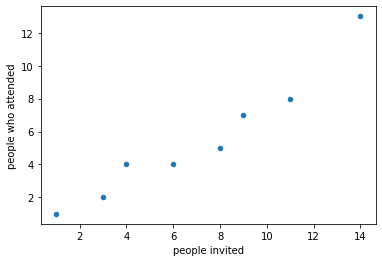

In [80]:
# Your code here.
scatter_party = party_data.plot.scatter(x = 'people invited', y = 'people who attended')
scatter_party

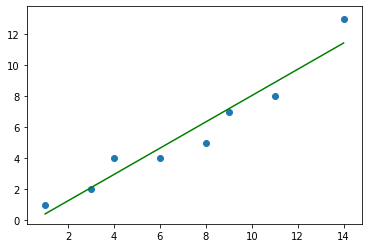

In [83]:
regression_party = model_party[0]*x + model_party[1]
regression_partyplot1 = plt.plot(x, regression_party, c = 'green')
plt.scatter(x, y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
'''
This plot tell us that these two variable are highly linearly correlated, with a correlation of 0.965 and positive covariation;
the method was made using the Pearson method.
'''

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

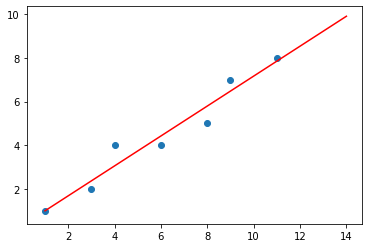

In [86]:
# Your response here. 

x1 = [1, 3, 4, 6, 8, 9, 11]
y1 = [1, 2, 4, 4, 5, 7, 8]
party_data1 = pd.DataFrame({'people invited': x1, 'people who attended': y1})

#calculing the parameters of the equation:
x1 = party_data1['people invited']
y1 = party_data1['people who attended']
model_party1 = stats.linregress(x1, y1)

#Regression
regression_party1 = model_party1[0]*x + model_party1[1]
regression_partyplot1 = plt.plot(x, regression_party1, c = 'red')
plt.scatter(x1, y1)
plt.show()



In [88]:
#correlations and covariance
corr_party1 = party_data1.corr()
print(corr_party1)
#covariance:
cov_party1 = party_data1.cov()
print(cov_party1)

                     people invited  people who attended
people invited             1.000000             0.971278
people who attended        0.971278             1.000000
                     people invited  people who attended
people invited            12.666667             8.666667
people who attended        8.666667             6.285714


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''
The correlation improved. I can say that removing outliers is crucial for the study, because it allows us to fit well the model,
and have a higher predictive power.
'''